In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

### Import Awards Data csv

In [2]:
awards_df = pd.read_csv('awards_df.csv')
awards_df.set_index('Titles', inplace=True)
awards_df.rename(columns={'Nominations': 'Show Nominations'}, inplace=True)
awards_df.head()

,Network,Award Year,Show Nominations,Actor Nominations,Total Nominations
Titles,,,,,
A Black Lady Sketch Show,NaN,2020,0,1,1
Atlanta,FX Networks,2018,5,4,9
Atlanta,FX Networks,2017,4,2,6
Barry,HBO,2019,4,5,9
Barry,HBO,2018,4,2,6


In [3]:
#sns.catplot(data=awards_df, x='Network', kind='count', hue='Network',dodge=False, aspect=2);

In [4]:
#show nominations by network/ year
#sns.catplot(data=awards_df, x='Network', y='Nominations', 
            #hue='Award Year',dodge=False, aspect=2, kind='bar', 
            #palette='CMRmap');

In [5]:
awards_grouped = awards_df.reset_index().groupby(['Network']).sum()
awards_grouped.sort_values('Total Nominations', inplace=True, ascending=False)
awards_grouped

,Award Year,Show Nominations,Actor Nominations,Total Nominations
Network,,,,
HBO,34315,32,56,88
Netflix,46428,21,38,59
Prime Video,8076,12,23,35
NBC,18169,8,21,29
FX Networks,16149,15,12,27
ABC,12111,4,14,18
Hulu,12114,7,11,18
Pop TV,4039,5,6,11
BBC America,6057,2,7,9


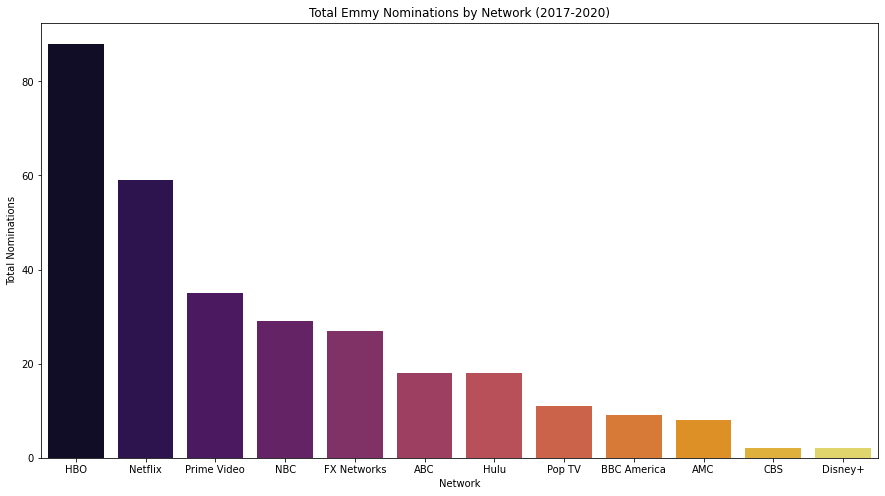

In [6]:
#show nominations by network for the last 4 years
fig, ax = plt.subplots(figsize=(15,8))

sns.barplot(data=awards_grouped.reset_index(),x='Network', y='Total Nominations',
           dodge=False, palette='inferno');
plt.title('Total Emmy Nominations by Network (2017-2020)')
plt.savefig('images/TotalNominationsAllNetworks.png')

In [7]:
#total nominations by network/ year
#sns.catplot(data=awards_df, x='Network', y='Total Nominations',
            #hue='Award Year',dodge=False, aspect=2, kind='bar',
            #palette='CMRmap');

In [8]:
top_networks = ['HBO','Prime Video', 'Netflix']
top_networks_boolean = awards_df.Network.isin(top_networks)
top_networks_df = awards_df[top_networks_boolean]

top_networks_df.head(3)

,Network,Award Year,Show Nominations,Actor Nominations,Total Nominations
Titles,,,,,
Barry,HBO,2019,4,5,9
Barry,HBO,2018,4,2,6
Bodyguard,Netflix,2019,1,0,1


In [9]:
top_networks_grouped = top_networks_df.reset_index().groupby(['Network']).sum()

In [10]:
#sns.scatterplot(data=top_networks_df.reset_index(), 
 #               x='Nominations', y='Actor Nominations', hue='Network')

In [11]:
#sns.heatmap(top_networks_grouped)

In [12]:
#sns.jointplot(data=top_networks_df.reset_index(),x='Nominations', y='Actor Nominations', 
 #          hue='Network',kind='kde');

In [13]:
#sns.displot(data=top_networks_df,x='Nominations', y='Actor Nominations', 
 #          hue='Network', palette='inferno')

In [14]:
top_networks_df.head()

,Network,Award Year,Show Nominations,Actor Nominations,Total Nominations
Titles,,,,,
Barry,HBO,2019,4,5,9
Barry,HBO,2018,4,2,6
Bodyguard,Netflix,2019,1,0,1
Curb Your Enthusiasm,HBO,2020,1,0,1
Curb Your Enthusiasm,HBO,2018,1,3,4


In [15]:
hbo_df = top_networks_df.loc[top_networks_df['Network'] == 'HBO']
netflix_df = top_networks_df.loc[top_networks_df['Network'] == 'Netflix']
prime_df = top_networks_df.loc[top_networks_df['Network'] == 'Prime Video']

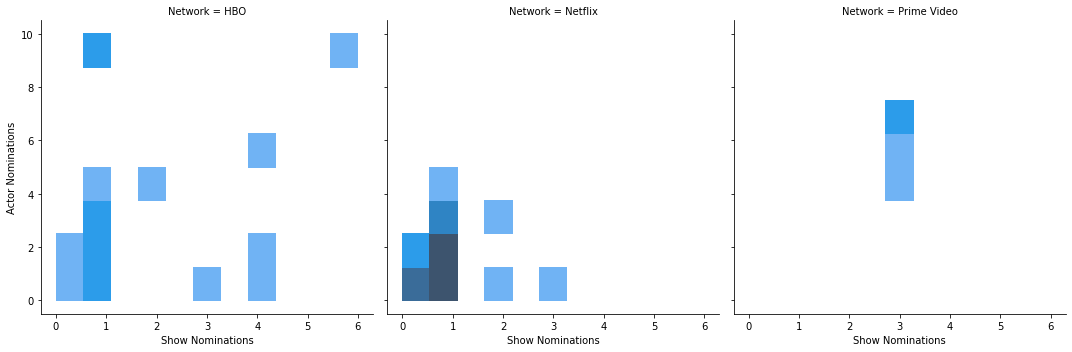

In [16]:
sns.displot(data=top_networks_df,x='Show Nominations', y='Actor Nominations', 
            col='Network', palette='inferno');
plt.savefig('NominationsByNetwork')

In [17]:
#f, axes = plt.subplots(1,3)

#sns.displot(data=hbo_df,x='Nominations', y='Actor Nominations');

In [18]:
#sns.displot(data=netflix_df,x='Nominations', y='Actor Nominations');

In [19]:
#sns.displot(data=prime_df,x='Nominations', y='Actor Nominations');

In [20]:
# top 3 nominated networks, total nominations over years
#plt.figure(figsize=(10,6))

#sns.lineplot(data=top_networks_grouped.reset_index(), x='Award Year', y='Total Nominations',
 #           hue='Network', 
  #          palette='CMRmap');

In [21]:
#sns.catplot(data=top_networks_df.reset_index(), x='Network', 
            #kind='count', palette='CMRmap', height=7, hue='index', ci=False,
            #dodge=False, legend=True);

In [22]:
#top_networks_df.reset_index().groupby(['Network','index']).sum().unstack().plot(kind='bar', 
 #                                                                               stacked=True, legend=False)

In [23]:
years = ['2019','2020']
years_boolean = top_networks_df["Award Year"].isin(years)
top_networks_grouped1 = top_networks_df[years_boolean]
top_networks_years = top_networks_grouped1.groupby(['Network', 'Titles']).sum().unstack()

In [24]:
sns.color_palette('inferno',as_cmap=True)

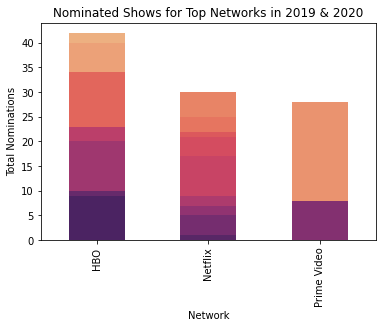

In [25]:
#number of shows per top network, for award years 19 and 20 only
top_networks_years.reset_index().plot(kind='bar', x='Network', y='Total Nominations', 
                                      stacked=True, colormap='flare_r', legend=False);
plt.title('Nominated Shows for Top Networks in 2019 & 2020');
plt.ylabel('Total Nominations');
plt.savefig('TopNetworkShows')

In [26]:
#sns.displot(data=top_networks_df.reset_index(), x='Network',y='Total Nominations')

In [27]:
#sns.displot(data=top_networks_df.reset_index(), y="Total Nominations", hue='index', multiple="stack", palette='inferno');

In [28]:
import plotly.express as px